In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
DATASETS = ["mnist", "cifar10", "imagenet"]
MODELS = ["lenet5"]
PRECISIONS = ["fp32", "int8", "uint8"]

accuracy = np.array([
    [  # lenet5
        [98.49, 98.61, 98.61],   # MNIST
        [np.nan, np.nan, np.nan],   # CIFAR10
        [np.nan, np.nan, np.nan],   # IMAGENET
    ]
])  

/var/folders/90/x64vzw396x9fdk6l553gkmkh0000gn/T/ipykernel_21583/3047272132.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


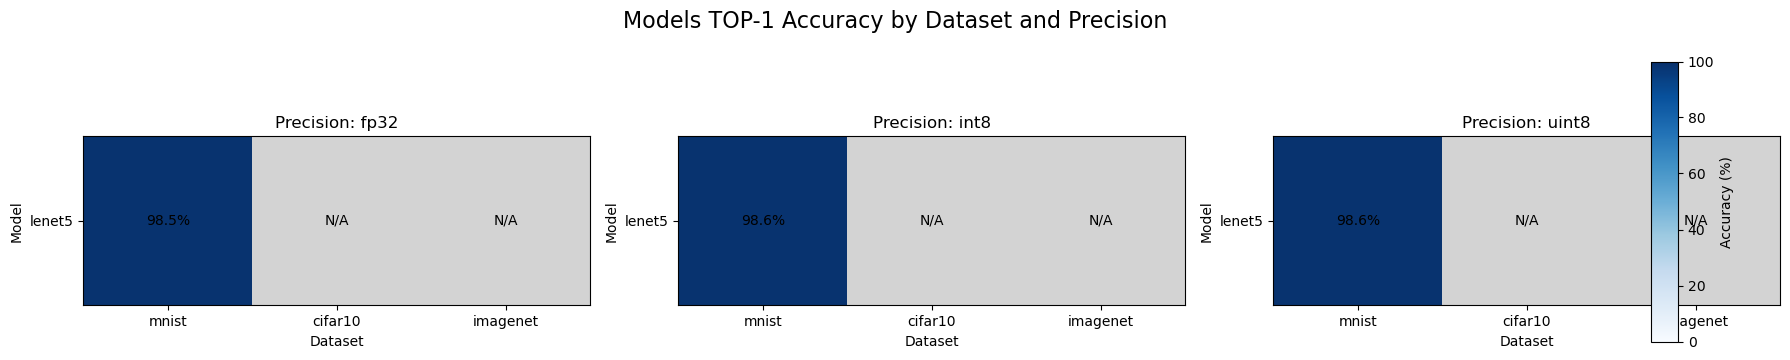

In [5]:
num_models = len(MODELS)
num_datasets = len(DATASETS)
num_precisions = len(PRECISIONS)

# Create subplots: one heatmap per precision
fig, axes = plt.subplots(1, num_precisions, figsize=(6 * num_precisions, 4), squeeze=False)

for p_idx, precision in enumerate(PRECISIONS):
    ax = axes[0, p_idx]
    heatmap = accuracy[:, :, p_idx]  # Shape: (num_models, num_datasets)

    # Mask missing values
    masked_heatmap = np.ma.masked_invalid(heatmap)
    cmap = plt.cm.Blues
    cmap.set_bad(color='lightgray')  # Customize color for missing entries

    im = ax.imshow(masked_heatmap, cmap=cmap, vmin=0, vmax=100)

    # Add labels
    for i in range(num_models):
        for j in range(num_datasets):
            if np.isnan(heatmap[i, j]):
                label = "N/A"
                color = "black"
            else:
                label = f"{heatmap[i, j]:.1f}%"
                color = "black"
            ax.text(j, i, label, ha="center", va="center", color=color)

    ax.set_xticks(np.arange(num_datasets))
    ax.set_xticklabels(DATASETS)
    ax.set_yticks(np.arange(num_models))
    ax.set_yticklabels(MODELS)
    ax.set_title(f"Precision: {precision}")
    ax.set_xlabel("Dataset")
    ax.set_ylabel("Model")

fig.suptitle("Models TOP-1 Accuracy by Dataset and Precision", fontsize=16)
cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])
fig.colorbar(im, cax=cbar_ax, label="Accuracy (%)")
plt.tight_layout()
plt.savefig("accuracy_map.png", bbox_inches="tight")
plt.show()